# Globi database exploration:

### Author: Yikang Li  
### Date: Nov, 5th, 2018

In [43]:
import pandas as pd
import pytaxize
import re
import matplotlib.pyplot as plt

#### Load the interaction data:

In [234]:
data =pd.read_csv('interactions.tsv', delimiter='\t', encoding='utf-8')

/Users/glance/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,27,30,31,32,33,34,35,36,37,40,41,43,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [291]:
data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceId,sourceOccurrenceId,sourceCatalogNumber,...,localityName,eventDateUnixEpoch,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:4472733,EOL:4472733 | EOL:4472733,Deinosuchus,genus,Deinosuchus,EOL:4472733,genus,NaN,NaN,NaN,...,NaN,NaN,"Rivera-Sylva H.E., E. Frey and J.R. Guzmán-Gui...",10.4267/2042/28152,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-31T23:54:05.938Z
1,EOL:4433651,EOL:4433651 | EOL:4433651,Daspletosaurus,genus,Daspletosaurus,EOL:4433651,genus,NaN,NaN,NaN,...,NaN,NaN,doi:10.1666/0022-3360(2001)075<0401:GCFACT>2.0...,10.1666/0022-3360(2001)075<0401:GCFACT>2.0.CO;2,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-31T23:54:05.938Z
2,EOL:24210058,EOL:24210058 | OTT:3617018 | GBIF:4975216 | EO...,Repenomamus robustus,species,Eucarya | Opisthokonta | Metazoa | Eumetazoa |...,EOL:5610326 | EOL:2910700 | EOL:42196910 | EOL...,| | subkingdom | | | | | | | | | supe...,NaN,NaN,NaN,...,NaN,NaN,doi:10.1038/nature03102,10.1038/nature03102,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-31T23:54:05.938Z
3,EOL:4433892,EOL:4433892 | EOL:4433892,Sinocalliopteryx gigas,species,Sinocalliopteryx gigas,EOL:4433892,species,NaN,NaN,NaN,...,NaN,NaN,doi:10.1371/journal.pone.0044012,10.1371/journal.pone.0044012,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-31T23:54:05.938Z
4,EOL:4433892,EOL:4433892 | EOL:4433892,Sinocalliopteryx gigas,species,Sinocalliopteryx gigas,EOL:4433892,species,NaN,NaN,NaN,...,NaN,NaN,doi:10.1371/journal.pone.0044012,10.1371/journal.pone.0044012,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-31T23:54:05.938Z


In [242]:
#check the number of rows:
len(data)

3419695

#### Variables in the database:   

In [244]:
data.columns

Index(['sourceTaxonId', 'sourceTaxonIds', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonPathIds',
       'sourceTaxonPathRankNames', 'sourceId', 'sourceOccurrenceId',
       'sourceCatalogNumber', 'sourceBasisOfRecordId',
       'sourceBasisOfRecordName', 'sourceLifeStageId', 'sourceLifeStageName',
       'sourceBodyPartId', 'sourceBodyPartName', 'sourcePhysiologicalStateId',
       'sourcePhysiologicalStateName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonIds',
       'targetTaxonName', 'targetTaxonRank', 'targetTaxonPathNames',
       'targetTaxonPathIds', 'targetTaxonPathRankNames', 'targetId',
       'targetOccurrenceId', 'targetCatalogNumber', 'targetBasisOfRecordId',
       'targetBasisOfRecordName', 'targetLifeStageId', 'targetLifeStageName',
       'targetBodyPartId', 'targetBodyPartName', 'targetPhysiologicalStateId',
       'targetPhysiologicalStateName', 'decimalLatitude', 'decimalLongitude',
       'loc

#### How many different types of taxons as sources & target? 

In [245]:
#source taxon
len(data['sourceTaxonId'].unique())

145291

In [246]:
#Target taxon
len(data['targetTaxonId'].unique())

104399

#### What interaction types are there?

In [247]:
data['interactionTypeName'].unique()

array(['eats', 'preysOn', 'interactsWith', 'pollinates', 'parasiteOf',
       'pathogenOf', 'visitsFlowersOf', 'adjacentTo', 'dispersalVectorOf',
       'endoparasitoidOf', 'symbiontOf', 'endoparasiteOf', 'hasVector',
       'ectoParasiteOf', 'vectorOf', 'livesOn', 'livesNear',
       'parasitoidOf', 'guestOf', 'livesInsideOf', 'farms',
       'ectoParasitoid', 'inhabits', 'kills', 'hasDispersalVector',
       'livesUnder', 'kleptoparasiteOf', 'hostOf', 'visits', 'eatenBy',
       'flowersVisitedBy', 'hasHost', 'preyedUponBy', 'hasParasite',
       'pollinatedBy', 'hasPathogen'], dtype=object)

In [248]:
#number of different types of interaction
len(data['interactionTypeName'].unique())

36

#### Drop duplicates:

In [ ]:
data.drop_duplicates(['sourceTaxonId', 'interactionTypeName', 'targetTaxonId'], inplace = True)

#### Let's look at certain taxon:

For example, suppose we are interested in the interactions involving 'Homo sapiens'

Take interactions involving 'Homo sapiens':

In [249]:
#Types of interactions involving Homo sapiens as sourceTaxon:
data[data['sourceTaxonName'] == 'Homo sapiens']['interactionTypeName'].unique()

array(['interactsWith', 'eats', 'hostOf'], dtype=object)

In [250]:
#Number of records of interactions involving Homo sapiens as sourceTaxon:
len(data[data['sourceTaxonName'] == 'Homo sapiens'])

815

#### Let's focus on certain type of interaction involving Homo_sapiens as sourceTaxon, for example "eats":

In [118]:
hs_eats_data = data[(data['sourceTaxonName'] == 'Homo sapiens') & (data['interactionTypeName'] == 'eats')]

In [119]:
hs_eats_data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceId,sourceOccurrenceId,sourceCatalogNumber,...,localityName,eventDateUnixEpoch,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
755562,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Barro Colorado Island, Panama",NaN,"Worthington, A. 1989. Adaptations for avian fr...",10.1007/BF00379040.,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-31T23:09:00.173Z
756855,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Mizoram, India",NaN,"Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...",10.1007/s10722-012-9799-5,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-31T23:09:00.173Z
756856,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Mizoram, India",NaN,"Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...",10.1007/s10722-012-9799-5,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-31T23:09:00.173Z
756857,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Mizoram, India",NaN,"Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...",10.1007/s10722-012-9799-5,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-31T23:09:00.173Z
756858,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Mizoram, India",NaN,"Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...",10.1007/s10722-012-9799-5,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-31T23:09:00.173Z


In [120]:
len(hs_eats_data)

379

In [121]:
#Drop missing values
target_hs_eats = hs_eats_data[['targetTaxonPathRankNames', 'targetTaxonPathNames']].dropna()
target_hs_eats.head()

,targetTaxonPathRankNames,targetTaxonPathNames
755562,kingdom | phylum | class | order | family | ge...,Plantae | Tracheophyta | Liliopsida | Arecales...
756856,kingdom | phylum | class | order | family | ge...,Plantae | Tracheophyta | Magnoliopsida | Myrta...
756857,kingdom | phylum | class | order | family,Plantae | Tracheophyta | Magnoliopsida | Erica...
756858,kingdom | phylum | class | order | family | ge...,Plantae | Tracheophyta | Magnoliopsida | Sapin...
756859,kingdom | phylum | class | order | family | ge...,Plantae | Tracheophyta | Liliopsida | Liliales...


In [122]:
len(target_hs_eats)

377

In [123]:
#clean 'targetTaxonPathRankNames' and 'targetTaxonPathNames' in order to extract certain ranks for later use:
#remove spaces
target_hs_eats['targetTaxonPathRankNames'] = target_hs_eats['targetTaxonPathRankNames'].str.replace(" ", "")
target_hs_eats['targetTaxonPathNames'] = target_hs_eats['targetTaxonPathNames'].str.replace(" ", "")

In [124]:
#split path names into lists:
target_hs_eats['targetTaxonPathRankNames'] = target_hs_eats['targetTaxonPathRankNames'].str.split('|')
target_hs_eats['targetTaxonPathNames'] =  target_hs_eats['targetTaxonPathNames'].str.split('|')

In [125]:
target_hs_eats.head()

,targetTaxonPathRankNames,targetTaxonPathNames
755562,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Liliopsida, Arecales, ..."
756856,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Magnoliopsida, Myrtale..."
756857,"[kingdom, phylum, class, order, family]","[Plantae, Tracheophyta, Magnoliopsida, Ericale..."
756858,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Magnoliopsida, Sapinda..."
756859,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Liliopsida, Liliales, ..."


In [126]:
#find the 'class/subclass/superclass' rank names by the position of 'class/subclass/superclass' in 'targetTaxonPathRankNames':
class_name = []
for i in range(len(target_hs_eats)):
    r = target_hs_eats.iloc[i]
    if re.search(r'\bclass\b', str(r['targetTaxonPathRankNames'])):
        ind = r['targetTaxonPathRankNames'].index('class')
        class_name.append(r['targetTaxonPathNames'][ind])
    elif re.search(r'\bsubclass\b', str(r['targetTaxonPathRankNames'])):
        ind = r['targetTaxonPathRankNames'].index('subclass')
        class_name.append(r['targetTaxonPathNames'][ind])
    elif re.search(r'\bsuperclass\b', str(r['targetTaxonPathRankNames'])):
        ind = r['targetTaxonPathRankNames'].index('superclass')
        class_name.append(r['targetTaxonPathNames'][ind])
    else:
        class_name.append('class not known')

In [127]:
#check the length is equal to length of 'target_hs_eats'
len(class_name)

377

In [128]:
#how many class rank names remain not known:
sum([i == 'class not known' for i in class_name])

3

There are 3 out of 377 target taxon that we don't know their class name.

In [129]:
#Add class rank names we found as a column 'class':
target_hs_eats['class'] = class_name
target_hs_eats.head()

,targetTaxonPathRankNames,targetTaxonPathNames,class
755562,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Liliopsida, Arecales, ...",Liliopsida
756856,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Magnoliopsida, Myrtale...",Magnoliopsida
756857,"[kingdom, phylum, class, order, family]","[Plantae, Tracheophyta, Magnoliopsida, Ericale...",Magnoliopsida
756858,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Magnoliopsida, Sapinda...",Magnoliopsida
756859,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Liliopsida, Liliales, ...",Liliopsida


#### Let's look at the rows whose class name is not known:

In [130]:
target_hs_eats[target_hs_eats['class'] == 'class not known']

,targetTaxonPathRankNames,targetTaxonPathNames,class
850656,"[kingdom, genus]","[Plantae, Fucus]",class not known
854753,"[kingdom, phylum]","[Animalia, Nemertea]",class not known
918181,"[, , , order, family, subfamily, genus, , spec...","[, , , Nidovirales, Coronaviridae, Coronavirin...",class not known


According to the table above, "class" is missing in the 'targetTaxonPathNames' for these target taxon.  
In order to get the class name of these rows, we need to do use "pytaxize" 

In [131]:
#First, we extract the bottom one from targetTaxonPathNames
no_class_taxon_names = [path[-1] for path 
                        in target_hs_eats[target_hs_eats['class'] == 'class not known']['targetTaxonPathNames']]
no_class_taxon_names

['Fucus', 'Nemertea', 'Rabbit']

We will use 'pytaxize.gnr_resolve' here to resolve the scientific names:  
See an example below for 'Homo sapiens':  

In [132]:
pytaxize.gnr_resolve('Homo sapiens')

[[{'data_source_id': 4,
   'data_source_title': 'NCBI',
   'gni_uuid': '16f235a0-e4a3-529c-9b83-bd15fe722110',
   'name_string': 'Homo sapiens',
   'canonical_form': 'Homo sapiens',
   'classification_path': '|Eukaryota|Opisthokonta|Metazoa|Eumetazoa|Bilateria|Deuterostomia|Chordata|Craniata|Vertebrata|Gnathostomata|Teleostomi|Euteleostomi|Sarcopterygii|Dipnotetrapodomorpha|Tetrapoda|Amniota|Mammalia|Theria|Eutheria|Boreoeutheria|Euarchontoglires|Primates|Haplorrhini|Simiiformes|Catarrhini|Hominoidea|Hominidae|Homininae|Homo|Homo sapiens',
   'classification_path_ranks': '|superkingdom||kingdom||||phylum|subphylum|||||superclass||||class||||superorder|order|suborder|infraorder|parvorder|superfamily|family|subfamily|genus|species',
   'classification_path_ids': '131567|2759|33154|33208|6072|33213|33511|7711|89593|7742|7776|117570|117571|8287|1338369|32523|32524|40674|32525|9347|1437010|314146|9443|376913|314293|9526|314295|9604|207598|9605|9606',
   'taxon_id': '9606',
   'edit_distance

Since the output will be a list containing just one list, we index [0] to get rid of the outer list:

In [133]:
pytaxize.gnr_resolve('Homo sapiens')[0]

[{'data_source_id': 4,
  'data_source_title': 'NCBI',
  'gni_uuid': '16f235a0-e4a3-529c-9b83-bd15fe722110',
  'name_string': 'Homo sapiens',
  'canonical_form': 'Homo sapiens',
  'classification_path': '|Eukaryota|Opisthokonta|Metazoa|Eumetazoa|Bilateria|Deuterostomia|Chordata|Craniata|Vertebrata|Gnathostomata|Teleostomi|Euteleostomi|Sarcopterygii|Dipnotetrapodomorpha|Tetrapoda|Amniota|Mammalia|Theria|Eutheria|Boreoeutheria|Euarchontoglires|Primates|Haplorrhini|Simiiformes|Catarrhini|Hominoidea|Hominidae|Homininae|Homo|Homo sapiens',
  'classification_path_ranks': '|superkingdom||kingdom||||phylum|subphylum|||||superclass||||class||||superorder|order|suborder|infraorder|parvorder|superfamily|family|subfamily|genus|species',
  'classification_path_ids': '131567|2759|33154|33208|6072|33213|33511|7711|89593|7742|7776|117570|117571|8287|1338369|32523|32524|40674|32525|9347|1437010|314146|9443|376913|314293|9526|314295|9604|207598|9605|9606',
  'taxon_id': '9606',
  'edit_distance': 0,
  'i

Then we get a list of dictionaries for the scientific name, each dictionary comes from a different data source.  
Here I index [0] again to get the dictionary from the first data source:

In [134]:
pytaxize.gnr_resolve('Homo sapiens')[0][0]

{'data_source_id': 4,
 'data_source_title': 'NCBI',
 'gni_uuid': '16f235a0-e4a3-529c-9b83-bd15fe722110',
 'name_string': 'Homo sapiens',
 'canonical_form': 'Homo sapiens',
 'classification_path': '|Eukaryota|Opisthokonta|Metazoa|Eumetazoa|Bilateria|Deuterostomia|Chordata|Craniata|Vertebrata|Gnathostomata|Teleostomi|Euteleostomi|Sarcopterygii|Dipnotetrapodomorpha|Tetrapoda|Amniota|Mammalia|Theria|Eutheria|Boreoeutheria|Euarchontoglires|Primates|Haplorrhini|Simiiformes|Catarrhini|Hominoidea|Hominidae|Homininae|Homo|Homo sapiens',
 'classification_path_ranks': '|superkingdom||kingdom||||phylum|subphylum|||||superclass||||class||||superorder|order|suborder|infraorder|parvorder|superfamily|family|subfamily|genus|species',
 'classification_path_ids': '131567|2759|33154|33208|6072|33213|33511|7711|89593|7742|7776|117570|117571|8287|1338369|32523|32524|40674|32525|9347|1437010|314146|9443|376913|314293|9526|314295|9604|207598|9605|9606',
 'taxon_id': '9606',
 'edit_distance': 0,
 'imported_at'

Now we can extract certain ranks of the classification path of 'Homo sapiens'.

In [135]:
#Following the steps above, we now get the 'classification_path' for all scientific names whose 'class' is missing: 
classification_path = [pytaxize.gnr_resolve(name)[0][0]['classification_path'] for name in no_class_taxon_names]
classification_path

['Chromista|Ochrophyta|Phaeophyceae|Fucales|Fucaceae|Fucus',
 'Animalia|Nemertea',
 '|||Nidovirales|Coronaviridae|Coronavirinae|Betacoronavirus||Rabbit']

In [136]:
#get rid of spaces and split into lists:
classification_path = [i.replace(" ", "") for i in classification_path]
classification_path = [i.split('|') for i in classification_path]
classification_path

[['Chromista', 'Ochrophyta', 'Phaeophyceae', 'Fucales', 'Fucaceae', 'Fucus'],
 ['Animalia', 'Nemertea'],
 ['',
  '',
  '',
  'Nidovirales',
  'Coronaviridae',
  'Coronavirinae',
  'Betacoronavirus',
  '',
  'Rabbit']]

In [137]:
#get the 'classification_path_ranks' for all scientific names whose 'class' is missing:
classification_path_ranks = [pytaxize.gnr_resolve(name)[0][0]['classification_path_ranks'] for name in no_class_taxon_names]
classification_path_ranks

['kingdom|phylum|class|order|family|genus',
 'kingdom|phylum',
 'superkingdom|||order|family|subfamily|genus||species']

In [138]:
#get rid of spaces and split into list:
classification_path_ranks = [i.replace(" ", "") for i in classification_path_ranks]
classification_path_ranks = [i.split('|') for i in classification_path_ranks]
classification_path_ranks

[['kingdom', 'phylum', 'class', 'order', 'family', 'genus'],
 ['kingdom', 'phylum'],
 ['superkingdom',
  '',
  '',
  'order',
  'family',
  'subfamily',
  'genus',
  '',
  'species']]

In [139]:
#Same as what we did before, find the 'class/subclass/superclass' rank names by their positions in 'path_ranks':
find_class_name = []
for i in range(len(classification_path_ranks)):
    path_ranks = classification_path_ranks[i]
    path = classification_path[i]
    if re.search(r'\bclass\b', str(path_ranks)):
        ind = path_ranks.index('class')
        find_class_name.append(path[ind])
    elif re.search(r'\bsubclass\b', str(path_ranks)):
        ind = path_ranks.index('subclass')
        find_class_name.append(path[ind])
    elif re.search(r'\bsuperclass\b', str(path_ranks)):
        ind = path_ranks.index('superclass')
        find_class_name.append(path[ind])
    else:
        find_class_name.append('no_class_found')

In [140]:
find_class_name

['Phaeophyceae', 'no_class_found', 'no_class_found']

There will still be some scientific names which do not have corresonding class name, here I just ignore them since they are only 2.

In [141]:
#Get the index of the 'class not known' rows in target_hs_eats:
index_class_not_known = target_hs_eats[target_hs_eats['class'] == 'class not known'].index
index_class_not_known

Int64Index([850656, 854753, 918181], dtype='int64')

In [142]:
#Replace 'class not known' in column 'class' with class names we newly found:
for i,j in zip(index_class_not_known, range(len(find_class_name))):
    target_hs_eats.loc[i,'class'] = find_class_name[j]

In [143]:
#Check if we replaced it correctly:
target_hs_eats.loc[index_class_not_known]

,targetTaxonPathRankNames,targetTaxonPathNames,class
850656,"[kingdom, genus]","[Plantae, Fucus]",Phaeophyceae
854753,"[kingdom, phylum]","[Animalia, Nemertea]",no_class_found
918181,"[, , , order, family, subfamily, genus, , spec...","[, , , Nidovirales, Coronaviridae, Coronavirin...",no_class_found


### Success!

Now let's see what are the class that Homo sapiens most frequently eats:

In [144]:
target_hs_eats.groupby(target_hs_eats['class']).size().sort_values(ascending = False)

class
Mammalia           110
Actinopterygii      81
Magnoliopsida       52
Aves                36
Bivalvia            21
Gastropoda          10
Malacostraca         9
Liliopsida           8
Elasmobranchii       7
Reptilia             4
Ascidiacea           4
Echinoidea           3
Anthozoa             3
Insecta              3
Rosids               3
Cephalopoda          3
Maxillopoda          2
Phaeophyceae         2
Holothuroidea        2
Polyplacophora       2
no_class_found       2
Florideophyceae      1
Dothideomycetes      1
Chrysophyceae        1
Chondrichthyes       1
Ulvophyceae          1
Gnathostomata        1
Bangiophyceae        1
Teleostei            1
Asterids             1
Anopla               1
dtype: int64

In [145]:
#look at top 5 target class of Homo sapiens:
top5_target_hs_eats  = target_hs_eats.groupby(target_hs_eats['class']).size().sort_values(ascending = False)[0:5]
top5_target_hs_eats

class
Mammalia          110
Actinopterygii     81
Magnoliopsida      52
Aves               36
Bivalvia           21
dtype: int64

In [146]:
list(top5_target_hs_eats.index)

['Mammalia', 'Actinopterygii', 'Magnoliopsida', 'Aves', 'Bivalvia']

Above all, out of all classes, the top five popular food for Homo sapiens are Mammalia, Actinopterygii, Aves, Magnoliopsida and Bivalvia      

### Plot what we found in directed graphs:

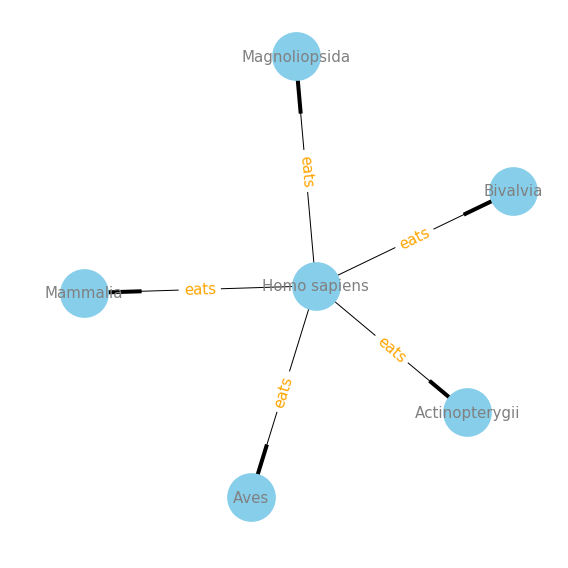

In [147]:
import networkx as nx
G = nx.DiGraph()

for name in (['Homo sapiens']+list(top5_target_hs_eats.index)):
    G.add_node(name)

for target in list(top5_target_hs_eats.index):
    G.add_edge('Homo sapiens', target, label = 'eats')


plt.figure(figsize=(8,8))
edge_labels = nx.get_edge_attributes(G,'label')

pos = nx.spring_layout(G) 
nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=15, font_color='orange')

nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue", alpha= 1, arrows=True, 
                    linewidths=10, font_color="grey", font_size=15)

plt.axis('off')
plt.tight_layout()
plt.show()

### What if we are interested in other interaction type or ranks?

Here I developed a function that helps us find top targets grouped in certain ranks for certain interaction types:

In [148]:
#getting top target taxons in certain ranks which interacts with Homo sapiens by certain interaction types:

def find_top_target(interactiontype, rank, head_n):
    
    hs_interaction_data = data[(data['sourceTaxonName'] == 'Homo sapiens') & (data['interactionTypeName'] == interactiontype)]
    target_hs_interact = hs_interaction_data[['targetTaxonPathRankNames', 'targetTaxonPathNames']].dropna()

    target_hs_interact['targetTaxonPathRankNames'] = target_hs_interact['targetTaxonPathRankNames'].str.replace(" ", "")
    target_hs_interact['targetTaxonPathNames'] = target_hs_interact['targetTaxonPathNames'].str.replace(" ", "")
    target_hs_interact['targetTaxonPathRankNames'] = target_hs_interact['targetTaxonPathRankNames'].str.split('|')
    target_hs_interact['targetTaxonPathNames'] =  target_hs_interact['targetTaxonPathNames'].str.split('|')

    rank_name = []
    for i in range(len(target_hs_interact)):
        r = target_hs_interact.iloc[i]
        if re.search(rank, str(r['targetTaxonPathRankNames'])):
            ind = r['targetTaxonPathRankNames'].index(rank)
            rank_name.append(r['targetTaxonPathNames'][ind])
        #elif re.search(r'\bsubclass\b', str(r['targetTaxonPathRankNames'])):
            #ind = r['targetTaxonPathRankNames'].index('subclass')
            #class_name.append(r['targetTaxonPathNames'][ind])
        #elif re.search(r'\bsuperclass\b', str(r['targetTaxonPathRankNames'])):
            #ind = r['targetTaxonPathRankNames'].index('superclass')
            #class_name.append(r['targetTaxonPathNames'][ind])
        else:
            rank_name.append('name not known')
        
    print('There are ' + str(sum([i == 'name not known' for i in rank_name])) + ' out of ' + str(len(rank_name)) + ' that we do not know their ' + str(rank) + ' name.')
    
    target_hs_interact[rank] = rank_name
    
    if sum([i == 'name not known' for i in rank_name]) > 0:
        no_rank_taxon_names = [path[-1] for path in target_hs_interact[target_hs_interact[rank] == 'name not known']['targetTaxonPathNames']]

        classification_path = [pytaxize.gnr_resolve(name)[0][0]['classification_path'] for name in no_rank_taxon_names]
        classification_path = [i.replace(" ", "") for i in classification_path]
        classification_path = [i.split('|') for i in classification_path]
        classification_path_ranks = [pytaxize.gnr_resolve(name)[0][0]['classification_path_ranks'] for name in no_rank_taxon_names]
        classification_path_ranks = [i.replace(" ", "") for i in classification_path_ranks]
        classification_path_ranks = [i.split('|') for i in classification_path_ranks]
        find_rank_name = []
        for i in range(len(classification_path_ranks)):
            path_ranks = classification_path_ranks[i]
            path = classification_path[i]
            if re.search(rank, str(path_ranks)):
                ind = path_ranks.index(rank)
                find_rank_name.append(path[ind])
            #elif re.search(r'\bsubclass\b', str(path_ranks)):
                #ind = path_ranks.index('subclass')
                #find_class_name.append(path[ind])
            #elif re.search(r'\bsuperclass\b', str(path_ranks)):
                #ind = path_ranks.index('superclass')
                #find_class_name.append(path[ind])
            else:
                find_rank_name.append('no_name_found')
        
        index_rank_not_known = target_hs_interact[target_hs_interact[rank] == 'name not known'].index
        for i,j in zip(index_rank_not_known, range(len(find_rank_name))):
            target_hs_interact.loc[i, rank] = find_rank_name[j]
    
    #drop missing ranks
    target_hs_interact = target_hs_interact[target_hs_interact[rank] != 'no_name_found']
    top_target_hs_interact  = target_hs_interact.groupby(target_hs_interact[rank]).size().sort_values(ascending = False)
    print('Top target '+ str(rank) + ' that Homo sapiens ' + str(interactiontype) +' :')
    return top_target_hs_interact.head(head_n)

For example, if we want to find top target orders that interact with Homo sapiens by interaction type "hostOf":

In [149]:
find_top_target('hostOf', 'order', 5)

There are 3 out of 29 that we do not know their order name.
Top target order that Homo sapiens hostOf :


order
Ixodida               11
Siphonaptera           6
Diphyllobothriidea     4
Trombidiformes         1
Phthiraptera           1
dtype: int64

In [150]:
top_target_order_hs_hostOf = list(find_top_target('hostOf', 'order', 5).index)
top_target_order_hs_hostOf

There are 3 out of 29 that we do not know their order name.
Top target order that Homo sapiens hostOf :


['Ixodida',
 'Siphonaptera',
 'Diphyllobothriidea',
 'Trombidiformes',
 'Phthiraptera']

In [289]:
def plot(top_target_list, interaction_type):
    G = nx.DiGraph()

    for name in (['Homo sapiens']+ top_target_list):
        G.add_node(name)

    for target in top_target_list:
        G.add_edge('Homo sapiens', target, label = interaction_type)

    plt.figure(figsize=(8,8))
    edge_labels = nx.get_edge_attributes(G,'label')

    pos = nx.spring_layout(G) 
    nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=15, font_color='orange')

    nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue", alpha= 1, arrows=True, 
                    linewidths=1, font_color="grey", font_size=15, style = 'dashed')

    plt.axis('off')
    plt.tight_layout()
    plt.show()

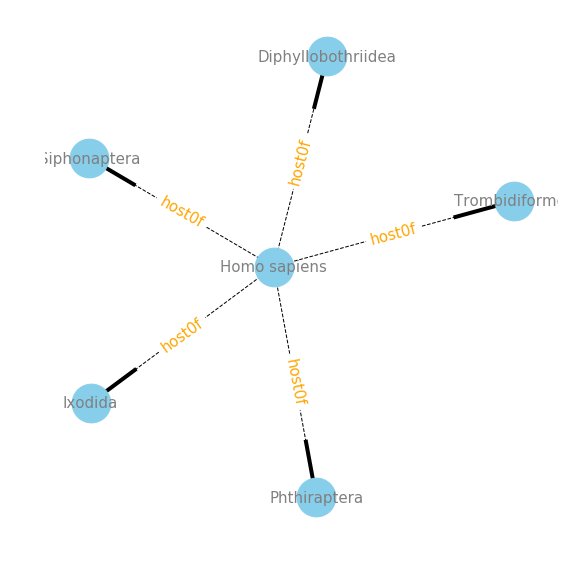

In [290]:
plot(top_target_order_hs_hostOf, 'host0f')

### We can also combine different interaction types into one table and link wikipedia url for taxons: 

In [227]:
d = {'eats': [dict(name= taxon, url='https://en.wikipedia.org/wiki/' + str(taxon)) for taxon in list(top5_target_hs_eats.index)],
     'hostOf': [dict(name= taxon, url='https://en.wikipedia.org/wiki/' + str(taxon)) for taxon in list(top_target_order_hs_hostOf)]
     }

df = pd.DataFrame(d)

urls_eats = dict(name= list(top5_target_hs_eats.index), 
             url= ['https://en.wikipedia.org/wiki/' + str(taxon) for taxon in list(top_target_order_hs_hostOf)])

urls_hostof = dict(name= top_target_order_hs_hostOf, 
             url= ['https://en.wikipedia.org/wiki/' + str(taxon) for taxon in top_target_order_hs_hostOf])

df['eats'] = [i + '#' + j for i,j in zip(urls_eats['name'], urls_eats['url'])]
df['hostOf'] = [i + '#' + j for i,j in zip(urls_hostof['name'], urls_hostof['url'])]


def make_clickable_both(val): 
    name, url = val.split('#')
    return f'<a href="{url}">{name}</a>'

df = df.style.format({'eats': make_clickable_both, 'hostOf': make_clickable_both})
df

,eats,hostOf
0,Mammalia,Ixodida
1,Actinopterygii,Siphonaptera
2,Magnoliopsida,Diphyllobothriidea
3,Aves,Trombidiformes
4,Bivalvia,Phthiraptera


### Plot:

In [230]:
# Define a function for plotting more than one type of interactions for specific source taxon:

def plot(interaction_table, source_taxon):
    G = nx.DiGraph()

    G.add_node(source_taxon)
    for c in interaction_table.columns:
        for i in list(df[c]):
            G.add_node(i)
                       
    for c in interaction_table.columns:
        for i in list(df[c]):
            G.add_edge(source_taxon, i, label = c)

    plt.figure(figsize=(10,10))
    edge_labels = nx.get_edge_attributes(G,'label')

    pos = nx.spring_layout(G) 
    nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=15, font_color='orange')

    nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue", alpha= 1, arrows=True, 
                    linewidths=1, font_color="grey", font_size=15, options = {'arrowstyle' : '-|>', 'arrowsize' : 10})

    plt.axis('off')
    plt.tight_layout()
    plt.show()

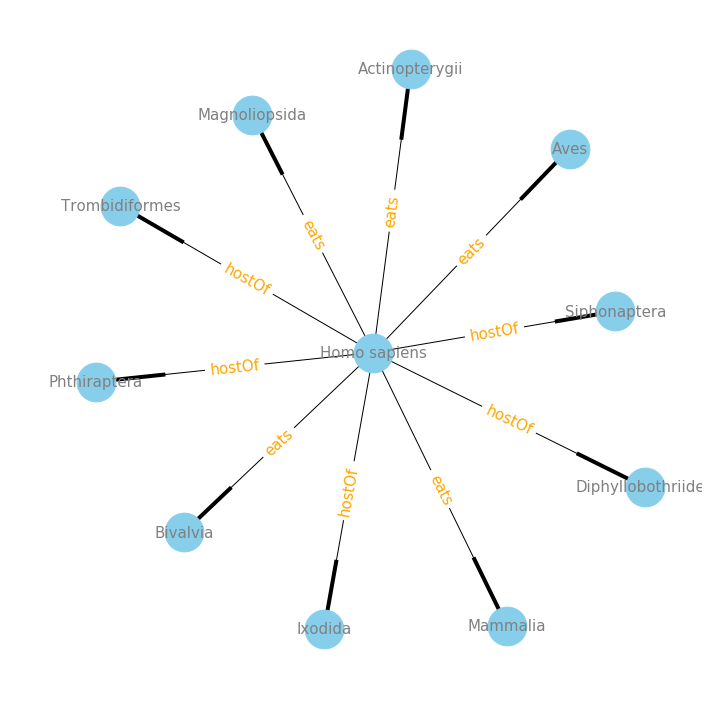

In [231]:
d = {'eats': list(top5_target_hs_eats.index),
     'hostOf': top_target_order_hs_hostOf}
df = pd.DataFrame(d)
plot(df, 'Homo sapiens')